MIS 451 - Assignment Clustering

Name: Tran Phuong Thao

IRN: 2132300447

# Importing the libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Importing the dataset

In [27]:
from google.colab import files
uploaded = files.upload()

Saving Clothing_Customers.csv to Clothing_Customers (1).csv


In [28]:
df = pd.read_csv('Clothing_Customers.csv')

# Check and Preprocessing Data

In [29]:
df.shape

(1000, 4)

=> This dataset have 1000 rows and 4 columns

In [30]:
df.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [31]:
df.describe()

,income,age,days_since_purchase,annual_spend
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,72617.904000,41.443000,419.564000,4337.220000
std,39511.966589,10.845939,112.150665,1667.289632
min,0.000000,18.000000,141.000000,243.000000
25%,39635.500000,31.000000,310.000000,2747.500000
50%,60204.500000,45.000000,455.500000,4879.500000
75%,111329.250000,50.000000,510.000000,5681.250000
max,171935.000000,66.000000,636.000000,7572.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   income               1000 non-null   int64
 1   age                  1000 non-null   int64
 2   days_since_purchase  1000 non-null   int64
 3   annual_spend         1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [33]:
df.isnull().sum()

,0
income,0
age,0
days_since_purchase,0
annual_spend,0


In [34]:
df.duplicated().sum()

np.int64(0)

=> This dataset have no missing data and no duplicated value. It is ready for analyze !!

# **DATA VISUALIZATION**

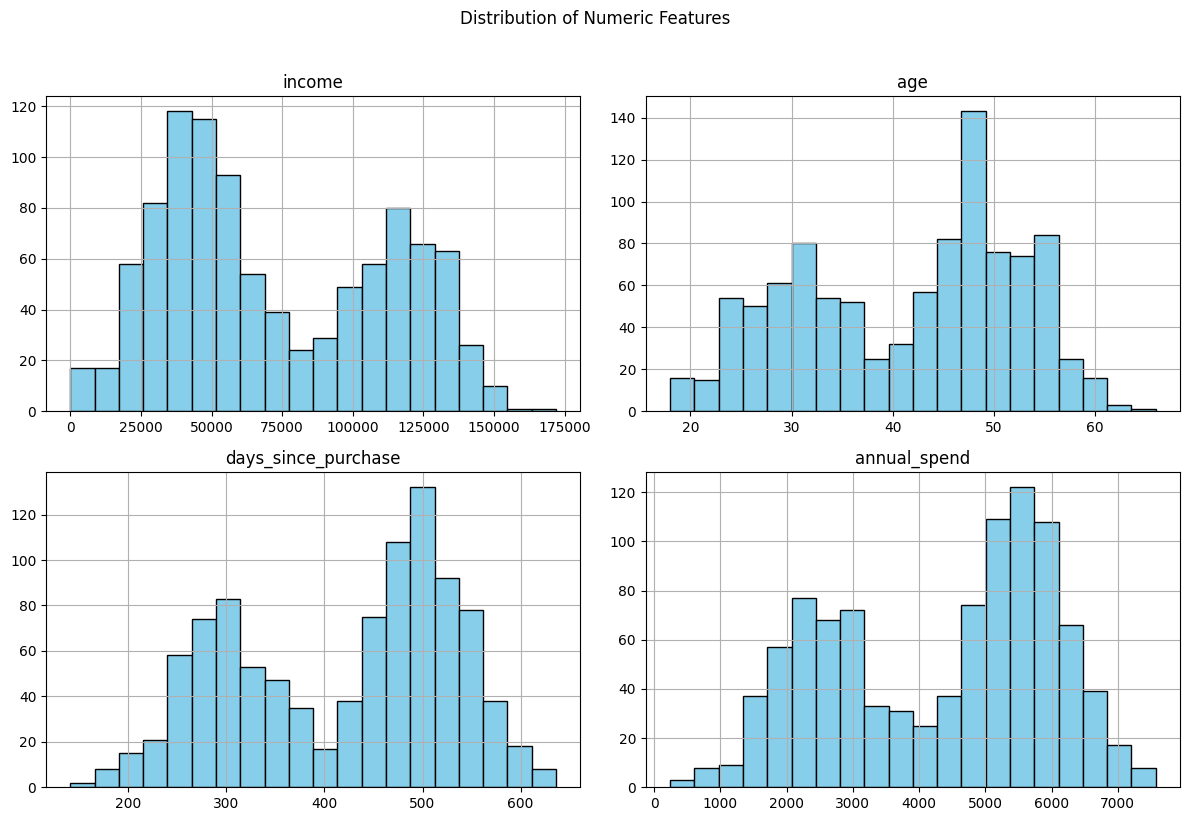

In [35]:
# Histograms for numerical features
df.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

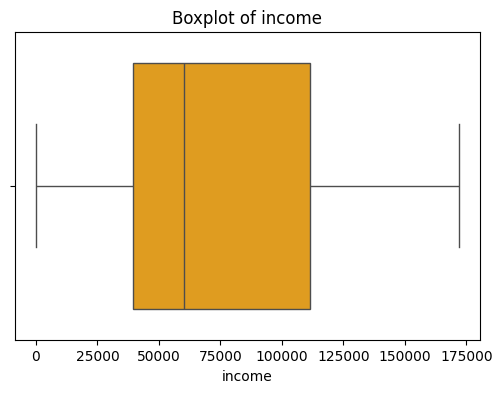

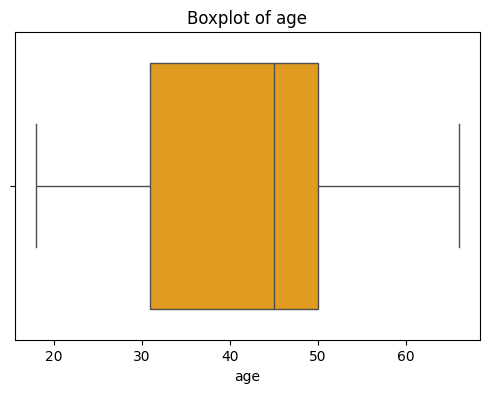

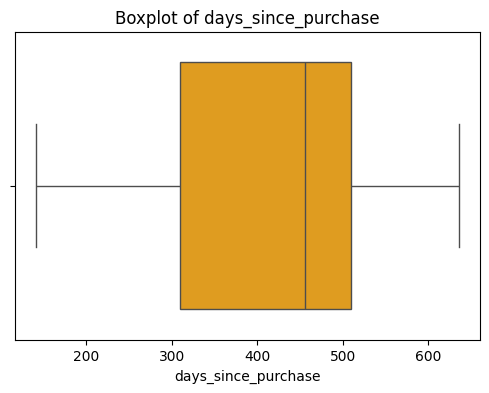

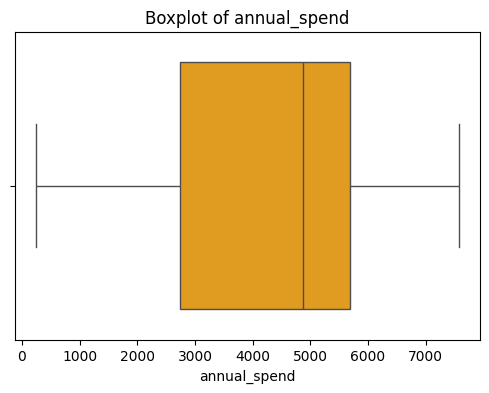

In [36]:
# Box plot to see outliers
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

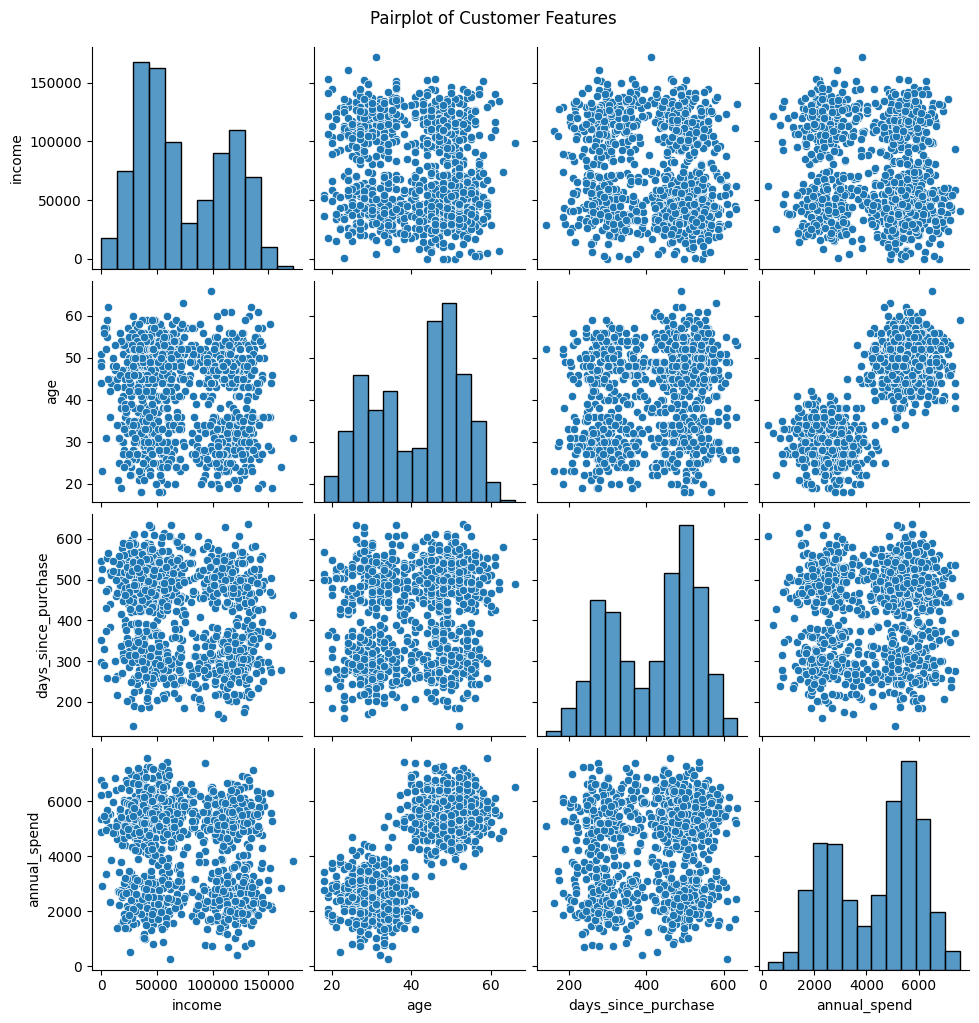

In [37]:
# Pairplot to see relationships
sns.pairplot(df)
plt.suptitle("Pairplot of Customer Features", y=1.02)
plt.show()

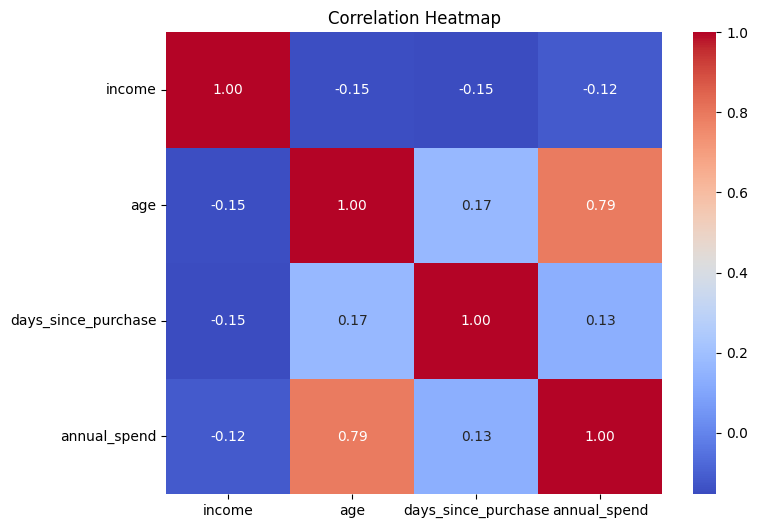

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

=> At the first time, I thought that "income" will have a strong relationship with "annual_spend". But after i visulize the data through Heat Map, it's clearly show that "age" and "annual_spend" have the strongest correlation.

#Data Preprocessing

In [39]:
# Select only numerical columns for clustering
features = df.select_dtypes(include=[np.number])
features.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [40]:
#Standardization is important because K-Means is distance-based.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.head()

,income,age,days_since_purchase,annual_spend
0,-0.890426,0.604861,0.753257,0.062276
1,-0.553094,0.789354,1.306361,-0.058939
2,-0.039778,-0.040865,-0.834688,0.898182
3,-0.516023,0.973847,-1.432398,0.671353
4,1.005897,-1.332317,-1.253977,-1.553129


# Determine Optimal Number of Clusters (Elbow Method)

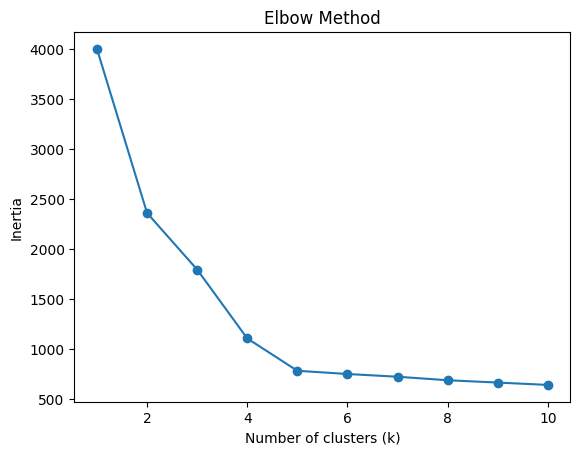

In [41]:
inertia = []

# Try different k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(False)
plt.show()

=> The "elbow" point suggests the optimal number of clusters is around from 3 to 5. In this case, I will choose **4 clusters**. Before i choose 4 clusters, i also run the code with 3 clusters and 5 clusters, but i regconize that with 3 clusters we can't not see clearly the hidden customer segmentation and with 5 cluster we will have 3 clusters overlap each other (i think it's not neccessary).

# Apply KMeans with 4 clusters

In [64]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df.head()

,income,age,days_since_purchase,annual_spend,Cluster,PCA1,PCA2
0,37453,48,504,4441,1,0.855025,-0.935161
1,50775,50,566,4239,1,0.963841,-1.047314
2,71047,41,326,5834,2,0.350945,0.742276
3,52239,52,259,5456,2,0.833541,0.960941
4,112343,27,279,1749,0,-2.476828,0.755844


=> Add a new column Cluster to assign each customer to a group.

# Visualize Clusters

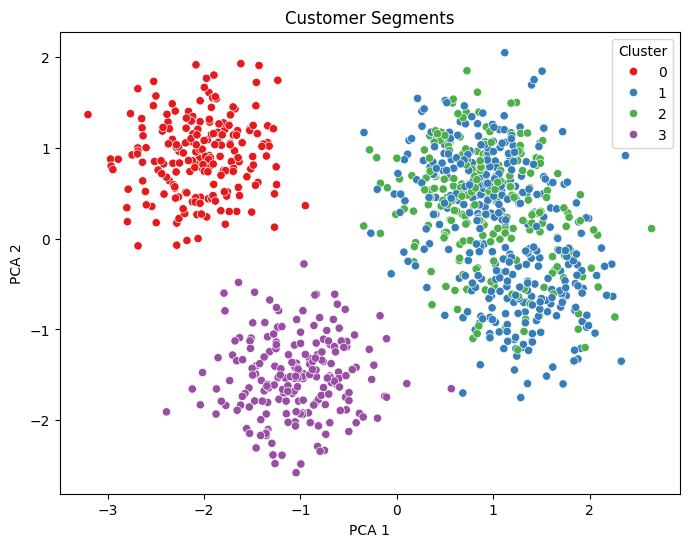

In [65]:
#Use PCA for 2D visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='Set1')
plt.title('Customer Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

=> We can see clearly 4 clusters. And cluster 1 and cluster 2 have a little bit ovelapping, maybe indicating hidden pattern like i mentioned before? I will explain it more in the interpretation part or report !!

In [66]:
df['Cluster'].value_counts()

,count
Cluster,
1,359
2,240
3,202
0,199


=> Many customers belong to Cluster 1 and Cluster 2. Who are they? And what are the identifying characteristics of those customers segmentation?

In [67]:
df.groupby('Cluster').mean()

,income,age,days_since_purchase,annual_spend,PCA1,PCA2
Cluster,,,,,,
0,116310.542714,29.291457,294.125628,2501.728643,-2.028239,0.911603
1,86113.537604,49.348189,507.155989,5547.167131,1.086344,0.102994
2,41571.379167,49.233333,324.329167,5588.512500,0.934205,0.370375
3,42476.311881,30.108911,500.618812,2508.415842,-1.042509,-1.521158


**Brief interpretation for 4 cluster:**

Cluster 0: High income, high spending → Target for premium products.

Cluster 1: Low income, low spending → Could offer discounts.

Cluster 2: High income, low spending → Potential to upsell.

Cluster 3: Young, moderate spending → Brand engagement needed.